In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading dataset
df = pd.read_csv('/Users/sawlehaanwaar/Documents/GitHub/life_expectancy_prediction_ml_model/data/raw/life_expectancy_data.csv')

In [13]:
#Sumamry statistics of data
summary_stats = df.describe()
print(summary_stats)

              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000

In [7]:
# Checking for missing values 
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [8]:
# Missing values in absolute and percentage
missing_data = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

In [11]:
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': percent_missing})
missing_df = missing_df[missing_df['Missing Values'] > 0]
print(missing_df)

                                 Missing Values  Percentage
Population                                  652    0.221920
Hepatitis B                                 553    0.188223
GDP                                         448    0.152485
Total expenditure                           226    0.076923
Alcohol                                     194    0.066031
Income composition of resources             167    0.056841
Schooling                                   163    0.055480
 thinness 5-9 years                          34    0.011572
 thinness  1-19 years                        34    0.011572
 BMI                                         34    0.011572
Polio                                        19    0.006467
Diphtheria                                   19    0.006467
Life expectancy                              10    0.003404
Adult Mortality                              10    0.003404


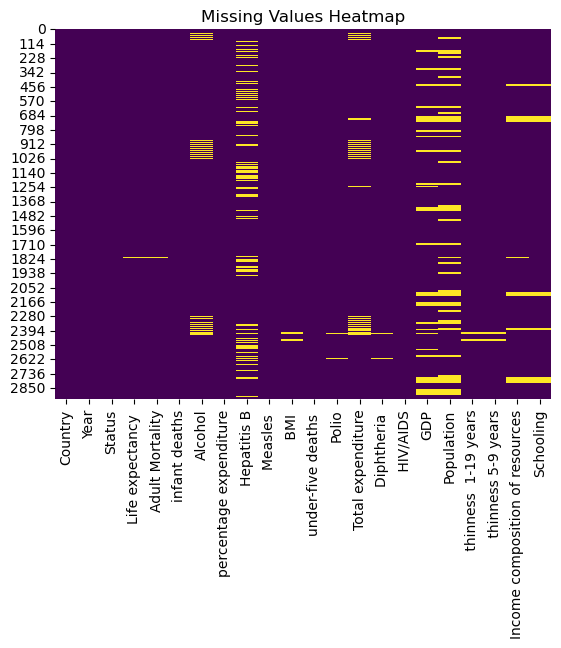

In [12]:
#Visualizing missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Values Heatmap')
plt.show()

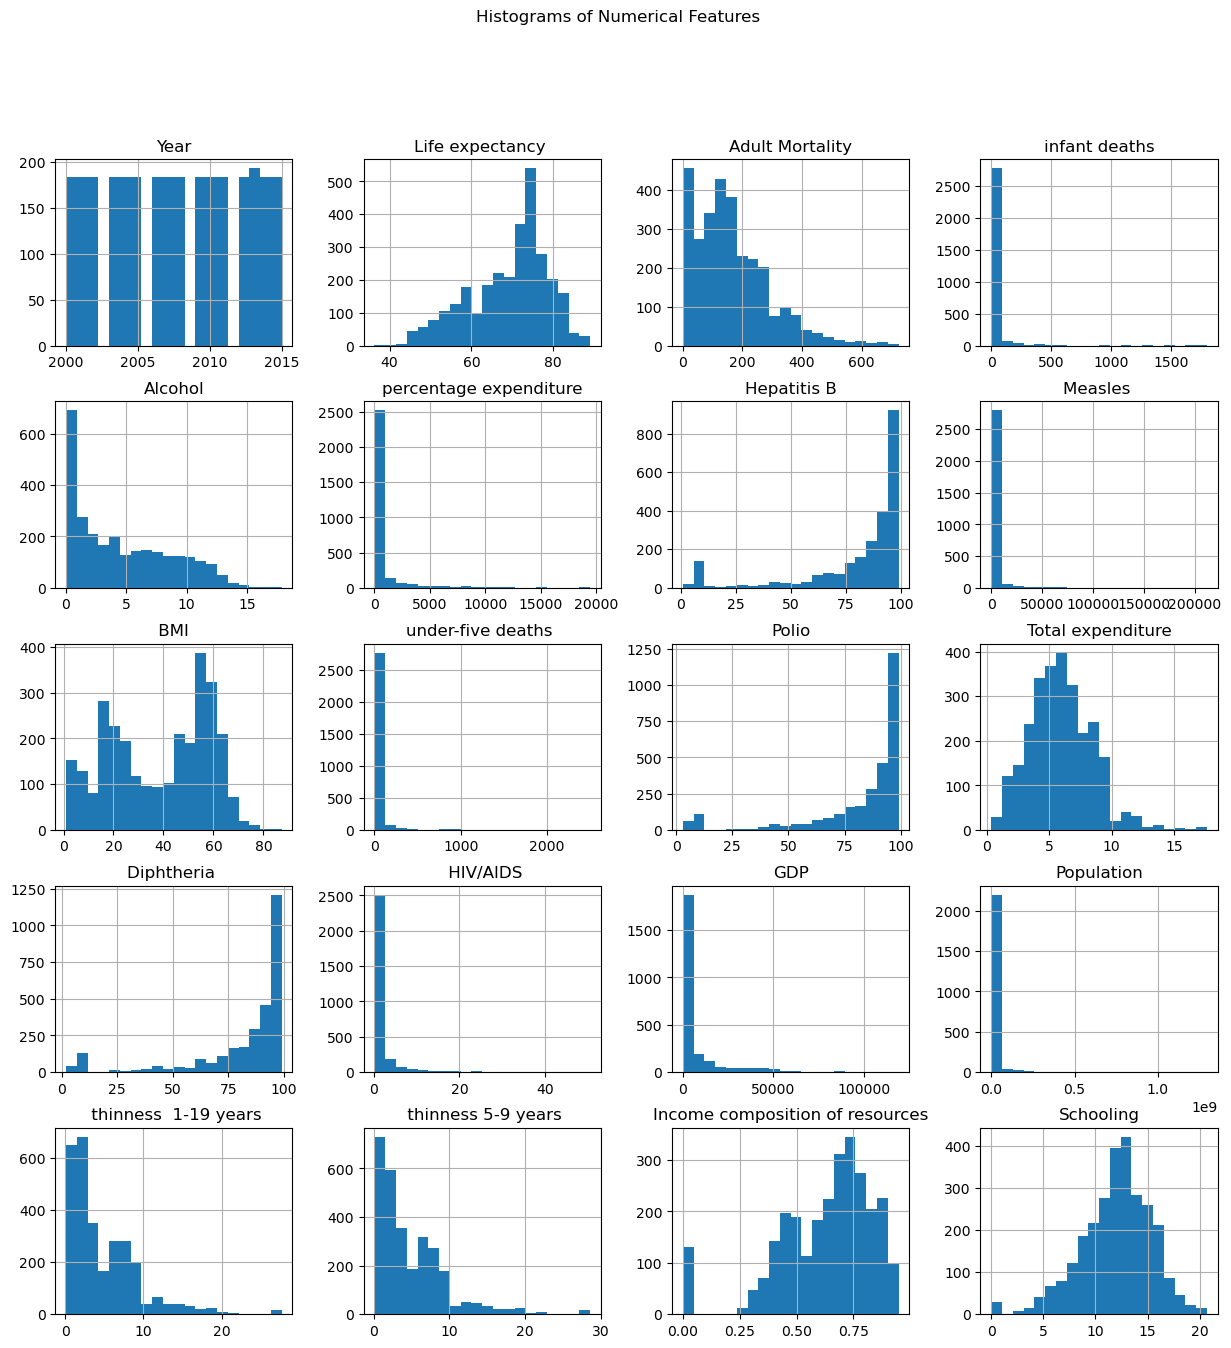

In [14]:
#Visualizing distribution of variables 
df.hist(bins=20, figsize=(15, 15))
plt.suptitle('Histograms of Numerical Features')
plt.show()

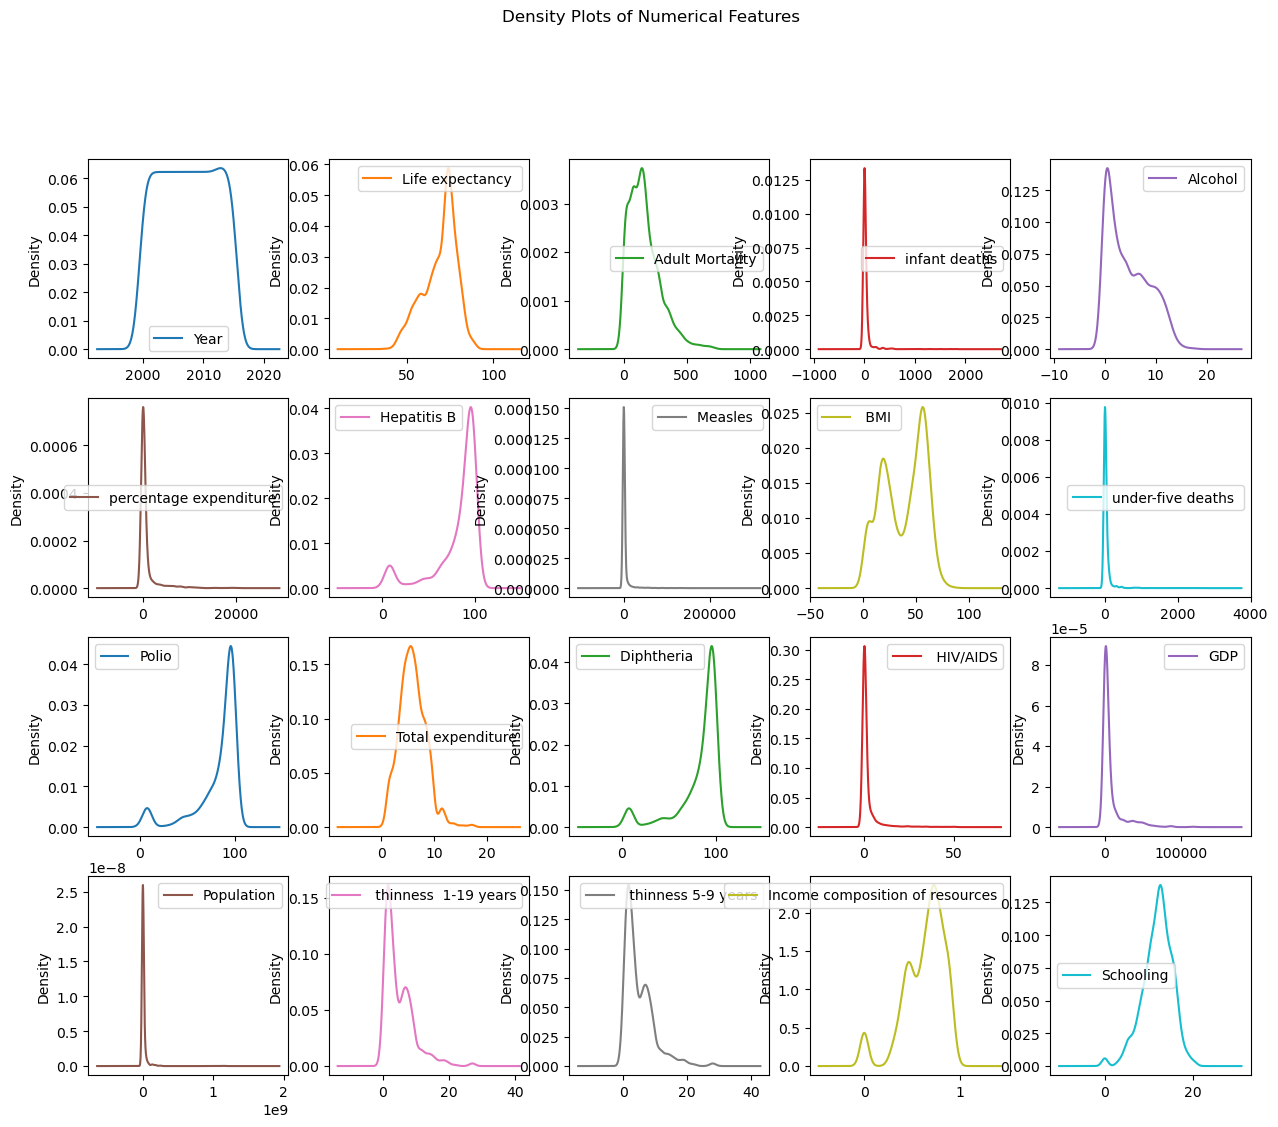

In [15]:
df.plot(kind='density', subplots=True, layout=(5, 5), sharex=False, figsize=(15, 15))
plt.suptitle('Density Plots of Numerical Features')
plt.show()

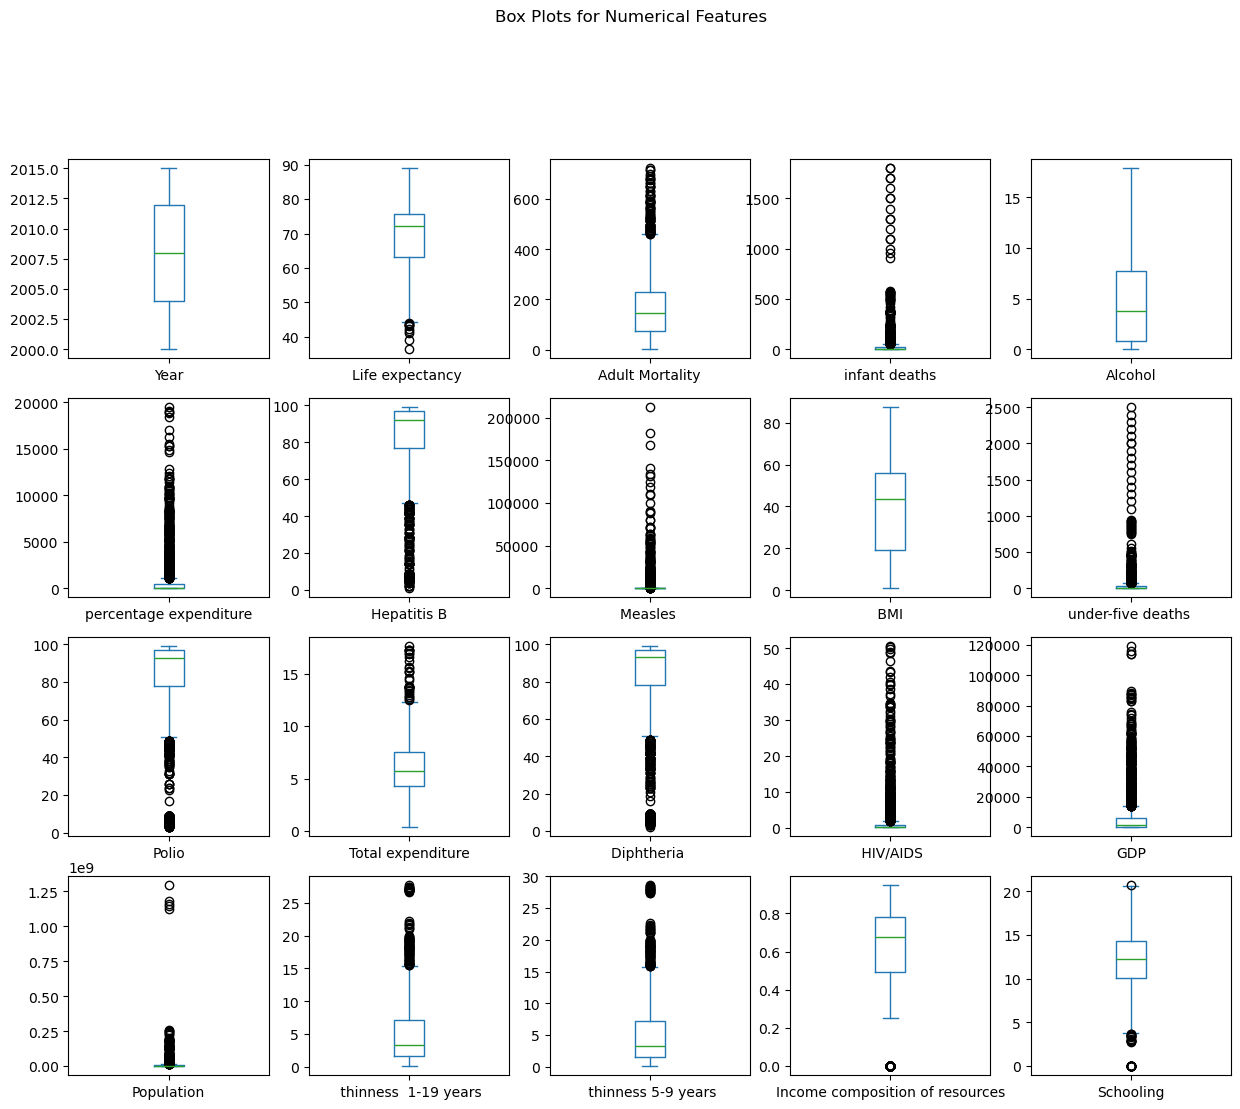

In [16]:
#Outlier identification of numerical variables - Visual through boxplots

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].plot(kind='box', subplots=True, layout=(5, 5), sharex=False, figsize=(15, 15))
plt.suptitle('Box Plots for Numerical Features')
plt.show()

In [22]:
# Checking skewness & kurtosis of numerical features
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

skewness = df[numeric_columns].skew()
kurtosis = df[numeric_columns].kurtosis()

distribution_analysis = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

print(distribution_analysis)

                                  Skewness    Kurtosis
Year                             -0.006409   -1.213722
Life expectancy                  -0.638605   -0.234477
Adult Mortality                   1.174369    1.748860
infant deaths                     9.786963  116.042756
Alcohol                           0.589563   -0.802909
percentage expenditure            4.652051   26.573387
Hepatitis B                      -1.930845    2.770259
Measles                           9.441332  114.859903
 BMI                             -0.219312   -1.291095
under-five deaths                 9.495065  109.752795
Polio                            -2.098053    3.776510
Total expenditure                 0.618686    1.156270
Diphtheria                       -2.072753    3.558143
 HIV/AIDS                         5.396112   34.892008
GDP                               3.206655   12.333074
Population                       15.916236  298.010267
 thinness  1-19 years             1.711471    3.970439
 thinness 

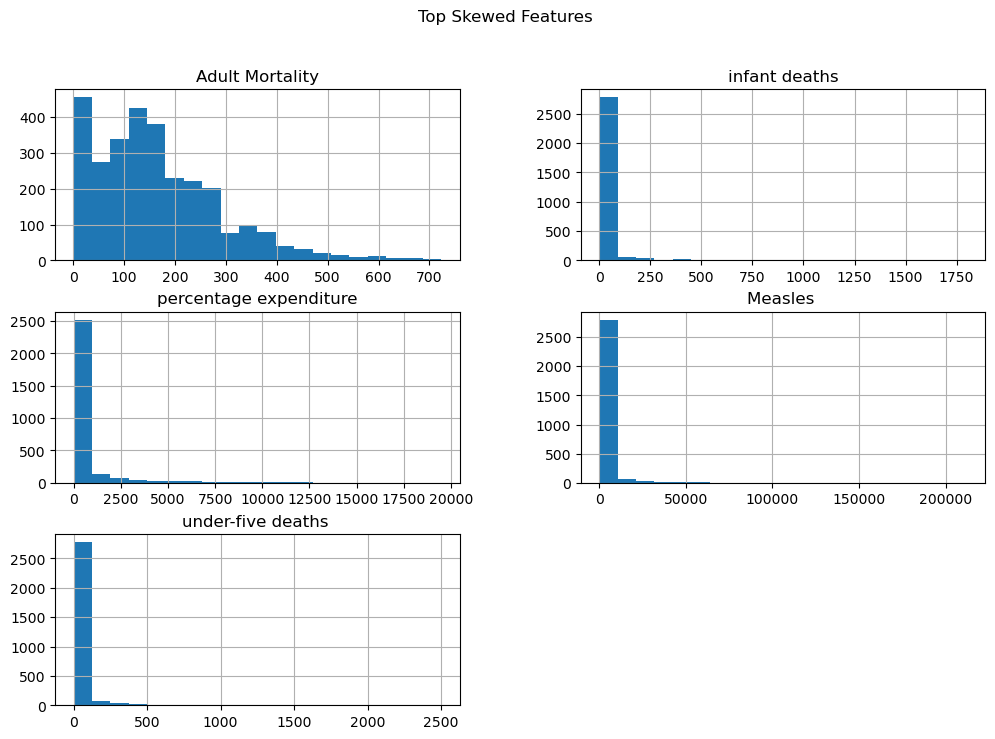

In [25]:
#Visualizing top 5 feature variables for skewness
top_n = 5
top_skewed = skewness[skewness > 1][:top_n].index

df[top_skewed].hist(bins=20, figsize=(12, 8))
plt.suptitle('Top Skewed Features')
plt.show()

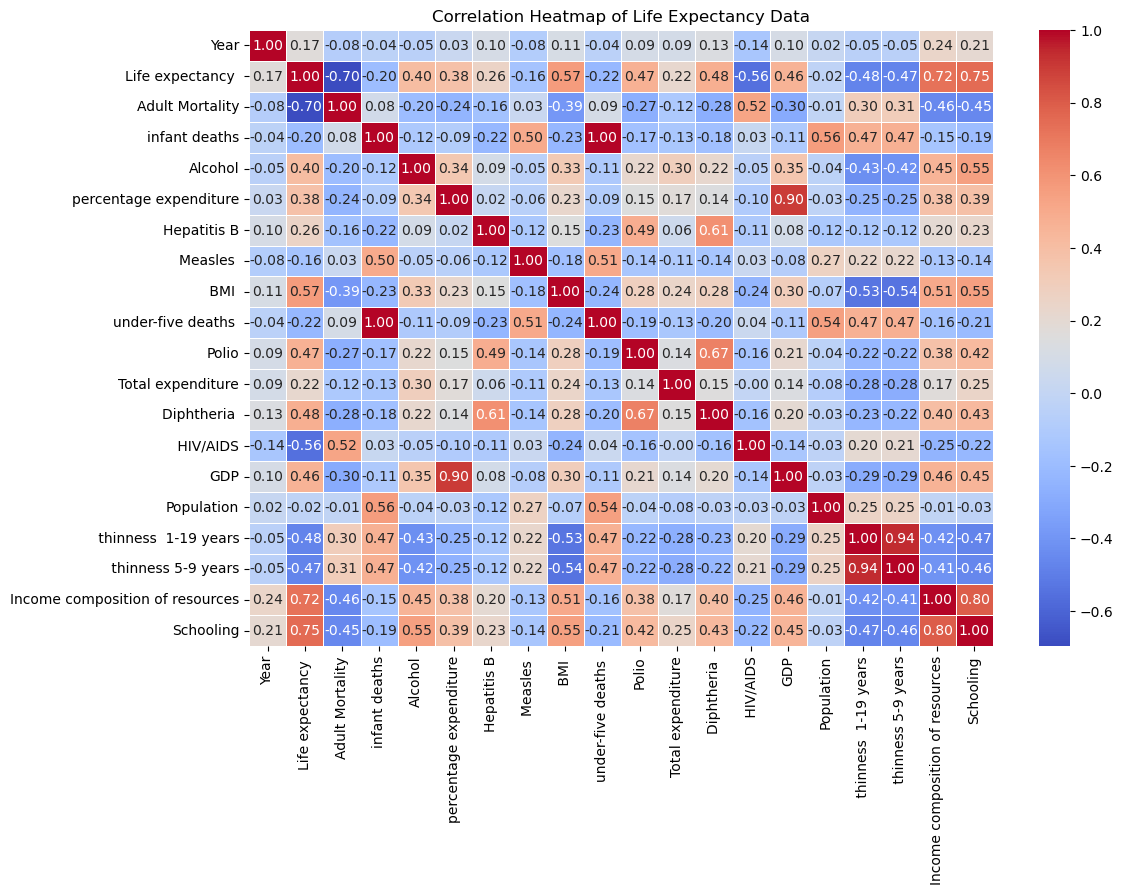

In [26]:
# Correlation matrix and Heatmap of numerical feature variables
df_numeric = df.select_dtypes(include=[float, int])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Life Expectancy Data')
plt.show()